In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = {
    'Diya/Light Count': [18, 18, 1, 1, 0, 1, 15, 5, 10, 20],
    'Color Intensity (1-10)': [9, 9, 5, 6, 4, 6, 3, 2, 2, 4],
    'Glow Area Ratio': [3, 3, 2, 2, 1, 2, 1, 1, 1, 1], # 1=Low, 2=Medium, 3=High
    'Target Label': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0] # 0=Dim, 1=Bright
}
df = pd.DataFrame(data)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

         Dim       1.00      1.00      1.00         2
      Bright       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



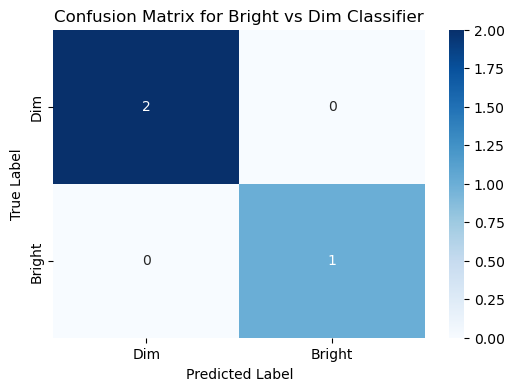

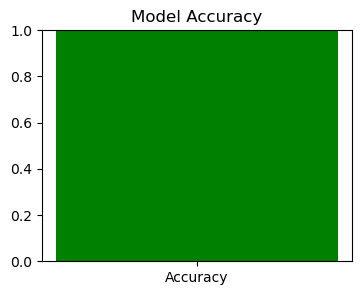

In [5]:
# Features (X) और Target (y) को परिभाषित करना
X = df[['Diya/Light Count', 'Color Intensity (1-10)', 'Glow Area Ratio']]
y = df['Target Label']

# 2. ट्रेन/टेस्ट स्प्लिट (70% Train, 30% Test)
# आपके 10 डेटा पॉइंट्स के लिए, 7 ट्रेनिंग और 3 टेस्टिंग के लिए इस्तेमाल होंगे।
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. मॉडल को प्रशिक्षित करना (KNN, K=1 का उपयोग करके, क्योंकि डेटासेट बहुत छोटा है)
# Note: छोटे डेटासेट के लिए K=1 या 3 का उपयोग करना उचित होता है
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

# 4. भविष्यवाणियाँ
y_pred = model.predict(X_test)

# 5. प्रदर्शन मूल्यांकन
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Dim', 'Bright'])

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

# 6. कन्फ्यूजन मैट्रिक्स प्लॉट करना (Task 3 Deliverable)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Dim', 'Bright'], yticklabels=['Dim', 'Bright'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Bright vs Dim Classifier')
plt.show()

# 7. एक्यूरेसी प्लॉट (Task 3 Deliverable)
# क्योंकि यह एक ही एक्यूरेसी वैल्यू है, इसे बार प्लॉट के रूप में दिखा सकते हैं
plt.figure(figsize=(4, 3))
plt.bar(['Accuracy'], [accuracy], color='green')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.show()